<a href="https://colab.research.google.com/github/gabriel7268/gabriel7268/blob/main/aula_engd02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula Prática - ENGD02
## Análise Exploratória de Dados
Docente: Karla Esquerre

Facilitador: Lucas Mascarenhas

Grupo Gamma: http://www.gamma.ufba.br/

### 1 - Pacotes

In [ ]:
# Pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2 - Carregando dados

In [ ]:
# Carregando dados
## Link do raw data do github
link = 'https://github.com/mascalmeida/auladatascience/blob/main/dataset/owid-covid-data.xlsx?raw=true'
## Carregando o dataset
dt = pd.read_excel(link)
## Visualizando o cabeçalho do dataset
dt.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


### 3 - Selecionando variáveis & Lidando com valores faltantes

In [ ]:
# Seleção de variáveis
## Informações gerais das variáveis
display(dt.info())
## Selecionando variáveis para investigação
df = dt.loc[:, ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'stringency_index', 'population']].dropna().reset_index(drop=True)
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79667 entries, 0 to 79666
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               79667 non-null  object 
 1   continent                              75781 non-null  object 
 2   location                               79667 non-null  object 
 3   date                                   79667 non-null  object 
 4   total_cases                            78097 non-null  float64
 5   new_cases                              78095 non-null  float64
 6   new_cases_smoothed                     77094 non-null  float64
 7   total_deaths                           68648 non-null  float64
 8   new_deaths                             68806 non-null  float64
 9   new_deaths_smoothed                    77094 non-null  float64
 10  total_cases_per_million                77673 non-null  float64
 11  ne

None

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population
0,AFG,Asia,Afghanistan,2020-03-22,34.0,4.0,1.0,1.0,41.67,38928341.0
1,AFG,Asia,Afghanistan,2020-03-23,41.0,7.0,1.0,0.0,41.67,38928341.0
2,AFG,Asia,Afghanistan,2020-03-24,43.0,2.0,1.0,0.0,50.93,38928341.0
3,AFG,Asia,Afghanistan,2020-03-25,76.0,33.0,2.0,1.0,59.26,38928341.0
4,AFG,Asia,Afghanistan,2020-03-26,80.0,4.0,3.0,1.0,59.26,38928341.0


### 4 - Filtrando os dados

In [ ]:
# Filtrando os dados
## Visualizando categorias
print(df['continent'].value_counts())
## Aplicando diferentes filtros
df_fil = df.loc[(df['continent'] == 'South America') & 
                (df['population'] > 21000000) &
                (df['date'] > '2021-01-01'), :].reset_index(drop=True)
display(df_fil)

Africa           17273
Europe           16020
Asia             14752
North America     6347
South America     4534
Oceania           1265
Name: continent, dtype: int64


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population
0,ARG,South America,Argentina,2021-01-02,1634834.0,5240.0,43375.0,56.0,79.17,45195777.0
1,ARG,South America,Argentina,2021-01-03,1640718.0,5884.0,43482.0,107.0,79.17,45195777.0
2,ARG,South America,Argentina,2021-01-04,1648940.0,8222.0,43634.0,152.0,79.17,45195777.0
3,ARG,South America,Argentina,2021-01-05,1662730.0,13790.0,43785.0,151.0,79.17,45195777.0
4,ARG,South America,Argentina,2021-01-06,1676171.0,13441.0,43976.0,191.0,79.17,45195777.0
...,...,...,...,...,...,...,...,...,...,...
446,VEN,South America,Venezuela,2021-03-31,160497.0,1348.0,1602.0,13.0,87.96,28435943.0
447,VEN,South America,Venezuela,2021-04-01,161751.0,1254.0,1615.0,13.0,87.96,28435943.0
448,VEN,South America,Venezuela,2021-04-02,162730.0,979.0,1629.0,14.0,87.96,28435943.0
449,VEN,South America,Venezuela,2021-04-03,164337.0,1607.0,1647.0,18.0,87.96,28435943.0


### 5 - Criando variáveis

In [ ]:
# Criando variáveis
## Preservando o dataset
df_new = df_fil.copy()
## Criando taxa de mortos/casos
df_new['rate_deaths_cases'] = (df_new['total_deaths']/df_new['total_cases'])
## Criando variável categorica
df_new['pop'] = 'Pequena'
df_new.loc[(df_new['population'] >= 10000000) & (df_new['population'] < 40000000), 'pop'] = 'Media'
df_new.loc[df_new['population'] >= 40000000, 'pop'] = 'Grande'
## Exibindo dados finais
display(df_new)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population,rate_deaths_cases,pop
0,ARG,South America,Argentina,2021-01-02,1634834.0,5240.0,43375.0,56.0,79.17,45195777.0,0.026532,Grande
1,ARG,South America,Argentina,2021-01-03,1640718.0,5884.0,43482.0,107.0,79.17,45195777.0,0.026502,Grande
2,ARG,South America,Argentina,2021-01-04,1648940.0,8222.0,43634.0,152.0,79.17,45195777.0,0.026462,Grande
3,ARG,South America,Argentina,2021-01-05,1662730.0,13790.0,43785.0,151.0,79.17,45195777.0,0.026333,Grande
4,ARG,South America,Argentina,2021-01-06,1676171.0,13441.0,43976.0,191.0,79.17,45195777.0,0.026236,Grande
...,...,...,...,...,...,...,...,...,...,...,...,...
446,VEN,South America,Venezuela,2021-03-31,160497.0,1348.0,1602.0,13.0,87.96,28435943.0,0.009981,Media
447,VEN,South America,Venezuela,2021-04-01,161751.0,1254.0,1615.0,13.0,87.96,28435943.0,0.009984,Media
448,VEN,South America,Venezuela,2021-04-02,162730.0,979.0,1629.0,14.0,87.96,28435943.0,0.010010,Media
449,VEN,South America,Venezuela,2021-04-03,164337.0,1607.0,1647.0,18.0,87.96,28435943.0,0.010022,Media


### 6 - Análise descritiva dos dados

In [ ]:
# Análise descritiva dos dados
print('Descritiva total:')
display(df_new.describe())
print('Descritiva do Brasil:')
display(df_new.loc[df_new['iso_code'] == 'BRA', :].describe())
print('Média da taxa de mortos por casos de Brasil x Argentina:')
print('Brasil = ', df_new.loc[df_new['iso_code'] == 'BRA', 'rate_deaths_cases'].mean())
print('Argentina = ', df_new.loc[df_new['iso_code'] == 'ARG', 'rate_deaths_cases'].mean())
print('Máximo índice de restrição da América do Sul:', df_new.loc[:, 'stringency_index'].max())

Descritiva total:


,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population,rate_deaths_cases
count,4.510000e+02,451.000000,451.000000,451.000000,451.000000,4.510000e+02,451.000000
mean,2.804388e+06,14117.576497,71884.618625,320.940133,78.391619,6.893898e+07,0.024099
std,3.233223e+06,20666.592341,77876.238255,494.383368,7.908479,6.575620e+07,0.008468
min,1.140830e+05,0.000000,1032.000000,0.000000,60.190000,2.843594e+07,0.009046
25%,1.078060e+06,985.500000,39159.000000,11.500000,72.690000,3.297185e+07,0.024174
50%,1.885210e+06,6761.000000,49566.000000,152.000000,81.020000,4.519578e+07,0.024950
75%,2.288250e+06,13660.000000,59713.000000,324.000000,84.260000,5.088288e+07,0.026544
max,1.187139e+07,90570.000000,290314.000000,2841.000000,90.740000,2.125594e+08,0.037118


Descritiva do Brasil:


,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population,rate_deaths_cases
count,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.0,77.000000
mean,9.648389e+06,54166.389610,235846.688312,1232.506494,69.354935,212559409.0,0.024479
std,1.170711e+06,21066.939405,26077.291058,599.848394,3.613388,0.0,0.000349
min,7.716405e+06,0.000000,195725.000000,0.000000,61.570000,212559409.0,0.024086
25%,8.697368e+06,35742.000000,214147.000000,962.000000,67.130000,212559409.0,0.024229
50%,9.599565e+06,59119.000000,233520.000000,1214.000000,69.910000,212559409.0,0.024349
75%,1.055126e+07,66588.000000,254942.000000,1386.000000,72.690000,212559409.0,0.024622
max,1.187139e+07,90570.000000,290314.000000,2841.000000,76.390000,212559409.0,0.025365


Média da taxa de mortos por casos de Brasil x Argentina:
Brasil =  0.024478894129944258
Argentina =  0.024830488746113724
Máximo índice de restrição da América do Sul: 90.74


### 7 - Visualização de dados

https://www.data-to-viz.com/

https://seaborn.pydata.org/examples/index.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

7.1 - Dispersão

7.2 - Boxplot (+Violin)

7.3 - Histograma (+Density)

7.4 - Barras (+Pie)

7.5 - Correlograma (+Heatmap)

7.6 - Combinados

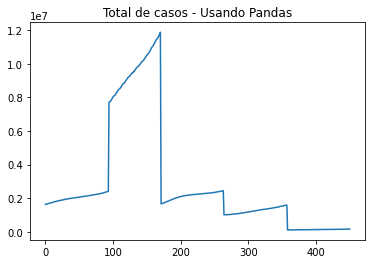

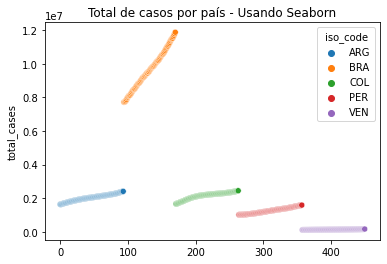

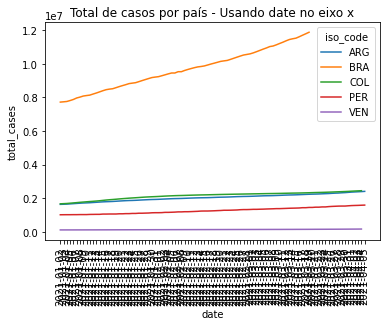

In [ ]:
# 7.1 - Dispersão
### Usando pandas
df_new['total_cases'].plot();
plt.title('Total de casos - Usando Pandas')
plt.show()
### Usando matplotlib
sns.scatterplot(x=df_new.index, y=df_new['total_cases'], hue=df_new['iso_code'])
plt.title('Total de casos por país - Usando Seaborn')
plt.show();
### Gráfico de linha
#### Dimensoes da figura
sns.lineplot(x=df_new['date'], y=df_new['total_cases'], hue=df_new['iso_code'])
plt.xticks(rotation=90)
plt.title('Total de casos por país - Usando date no eixo x')
## Plot ajustado
plt.show();

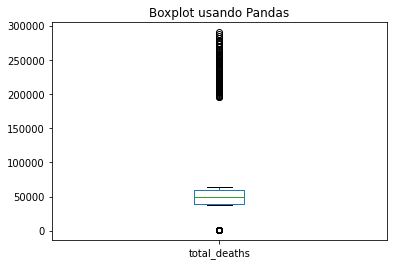

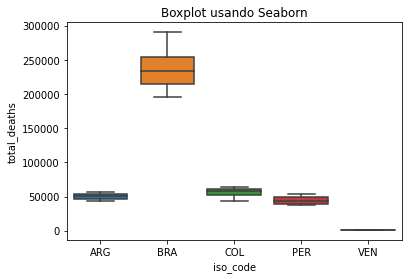

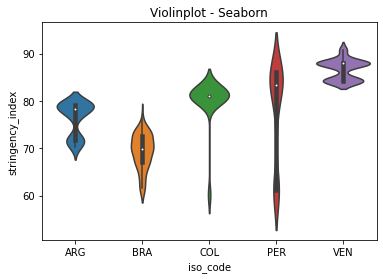

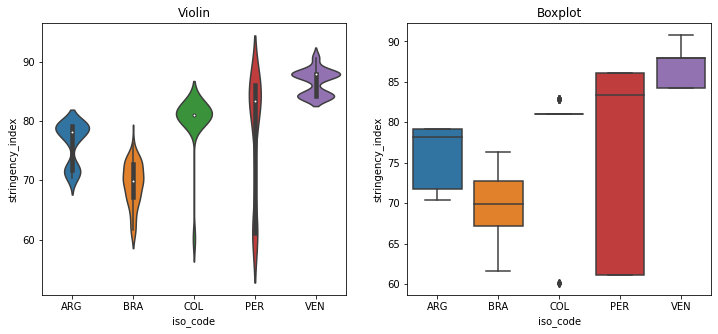

In [ ]:
# 7.2 - Boxplot (+Violin)
## Boxplot
### Pandas
df_new.loc[:, ['total_deaths']].plot.box()
plt.title('Boxplot usando Pandas')
plt.show();
### Seaborn
sns.boxplot(x=df_new['iso_code'], y=df_new['total_deaths'])
plt.title('Boxplot usando Seaborn')
plt.show();
## Violin
sns.violinplot(x='iso_code', y='stringency_index', data=df_new)
plt.title('Violinplot - Seaborn')
plt.show();
## Matrix
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1,2,1)
sns.violinplot(x='iso_code', y='stringency_index', data=df_new, ax=ax)
plt.title('Violin')
ax = fig.add_subplot(1,2,2)
sns.boxplot(x='iso_code', y='stringency_index', data=df_new, ax=ax)
plt.title('Boxplot')
plt.show();

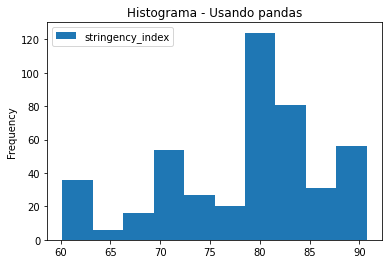

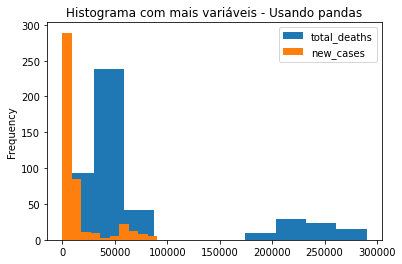

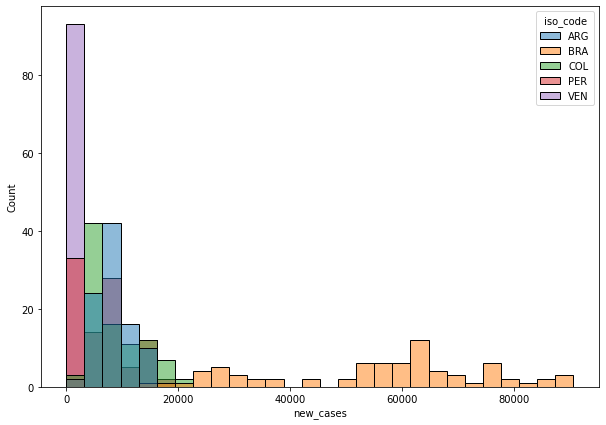

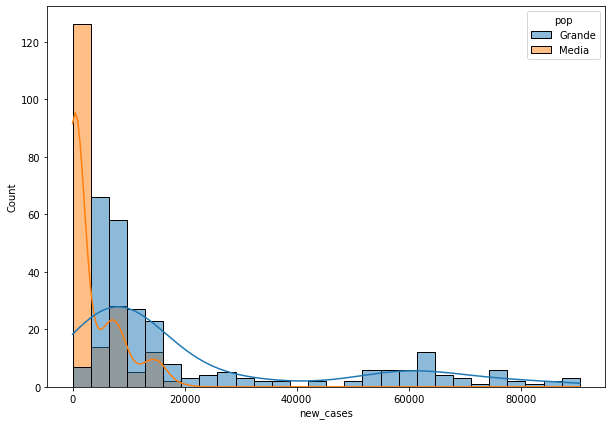

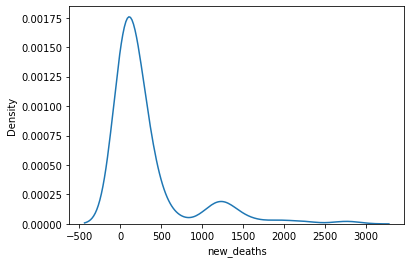

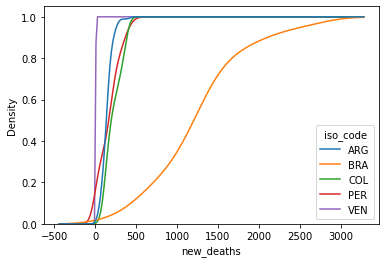

In [ ]:
# 7.3 - Histograma (+Density)
## Usando o Pandas
df_new[['stringency_index']].plot.hist()
plt.title('Histograma - Usando pandas')
plt.show();
## Acumulando variáveis - Usando Pandas
df_new['total_deaths'].plot.hist()
df_new['new_cases'].plot.hist()
plt.title('Histograma com mais variáveis - Usando pandas')
plt.legend()
plt.show();
## Usando Seaborn
plt.figure(figsize=(10, 7))
sns.histplot(data=df_new, x="new_cases", hue="iso_code", kde=False)
plt.show();
## Usando Seaborn - Adicionando densidade
plt.figure(figsize=(10, 7))
sns.histplot(data=df_new, x="new_cases", hue="pop", kde=True)
plt.show();
## Gráfico de densidade - Usando Seaborn
sns.kdeplot(data=df_new, x="new_deaths")
plt.show();
## Gráfico de densidade acumulado - Usando Seaborn
sns.kdeplot(data=df_new, x="new_deaths", hue="iso_code", cumulative=True, common_norm=False, common_grid=True)
plt.show();

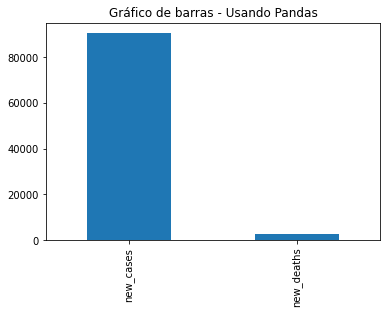

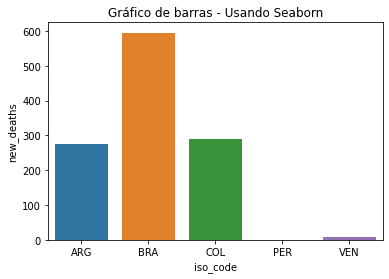

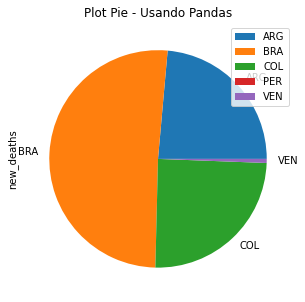

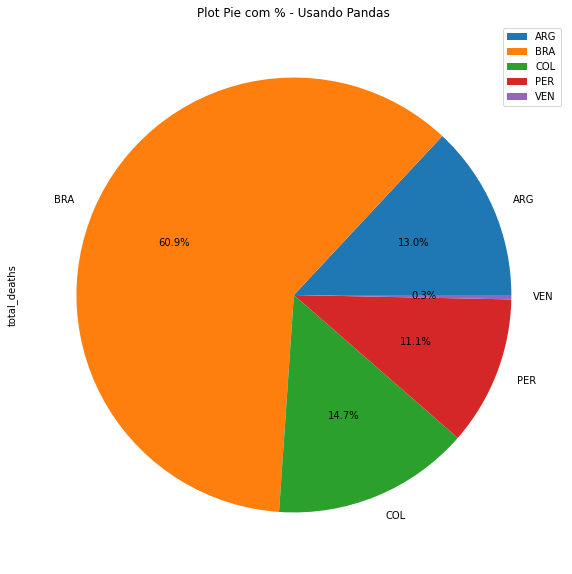

In [ ]:
# 7.4 - Barras (+Pie)
## Usando Pandas
df_new.loc[:, ['new_cases', 'new_deaths']].max().plot.bar()
plt.title('Gráfico de barras - Usando Pandas')
plt.show();
## Usando Seaborn
df_niver = df_new.loc[df_new['date'] == '2021-02-01', :]
sns.barplot(x="iso_code", y="new_deaths", data=df_niver)
plt.title('Gráfico de barras - Usando Seaborn')
plt.show();
## Gráfico de pizza - Usando Pandas
df_niver.index = df_niver['iso_code']
df_niver.plot.pie(y='new_deaths', figsize=(5, 5))
plt.title('Plot Pie - Usando Pandas')
plt.show();
## Gráfico de pizza com detalhes - Usando pandas
df_niver.index = df_niver['iso_code']
df_niver.plot.pie(y='total_deaths', figsize=(10, 10), autopct='%1.1f%%')
plt.title('Plot Pie com % - Usando Pandas')
plt.show();

Correlação - Pearson


,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population,rate_deaths_cases
total_cases,1.000000,0.899584,0.997378,0.877636,-0.564924,0.980270,0.157476
new_cases,0.899584,1.000000,0.897211,0.966045,-0.501930,0.888695,0.115493
total_deaths,0.997378,0.897211,1.000000,0.876685,-0.578420,0.974764,0.220738
new_deaths,0.877636,0.966045,0.876685,1.000000,-0.462163,0.845189,0.127930
stringency_index,-0.564924,-0.501930,-0.578420,-0.462163,1.000000,-0.545620,-0.419971
population,0.980270,0.888695,0.974764,0.845189,-0.545620,1.000000,0.062482
rate_deaths_cases,0.157476,0.115493,0.220738,0.127930,-0.419971,0.062482,1.000000



Correlação - Spearman


,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population,rate_deaths_cases
total_cases,1.000000,0.714163,0.982143,0.682214,-0.642132,0.943106,0.104774
new_cases,0.714163,1.000000,0.682650,0.921608,-0.545820,0.745118,0.088827
total_deaths,0.982143,0.682650,1.000000,0.687343,-0.576418,0.917312,0.163185
new_deaths,0.682214,0.921608,0.687343,1.000000,-0.470021,0.742330,0.173427
stringency_index,-0.642132,-0.545820,-0.576418,-0.470021,1.000000,-0.662089,-0.204362
population,0.943106,0.745118,0.917312,0.742330,-0.662089,1.000000,0.176466
rate_deaths_cases,0.104774,0.088827,0.163185,0.173427,-0.204362,0.176466,1.000000


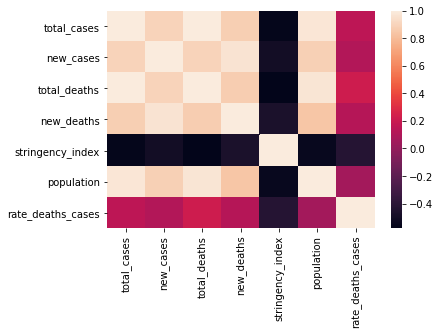

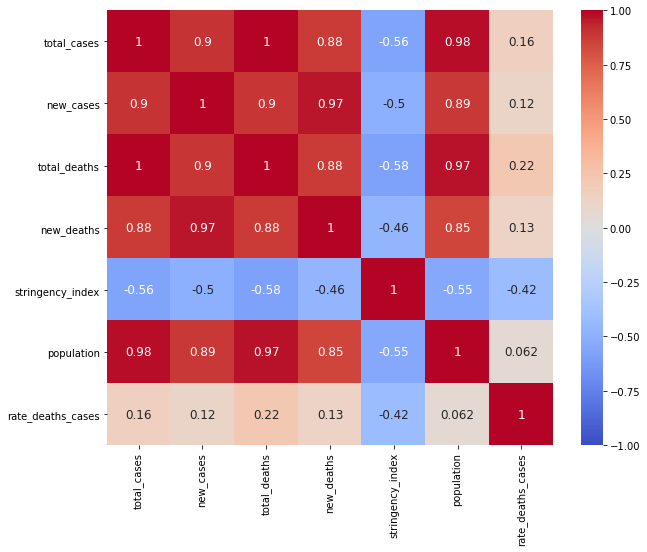

In [ ]:
# 7.5 - Correlograma (+Heatmap)
## Exibindo correlograma - Pearson
print('Correlação - Pearson')
display(df_new.corr(method='pearson'))
## Exibindo correlograma - Spearman
print('\nCorrelação - Spearman')
display(df_new.corr(method='spearman'))
print('\n\n')
## Heatmap a partir de pearson - Usando Seaborn
sns.heatmap(df_new.corr())
plt.show();
## Heatmap com detalhes - Usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df_new.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 12}, cmap="coolwarm")
plt.show();

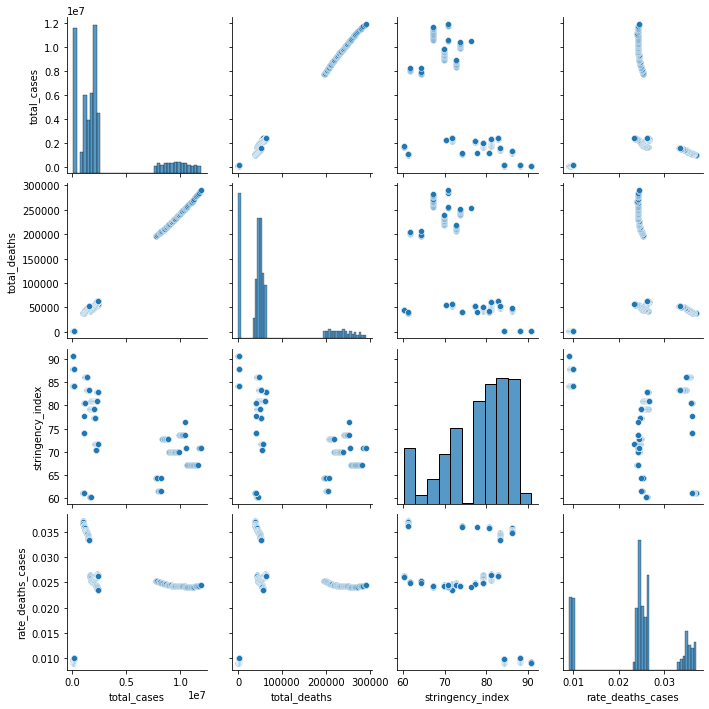

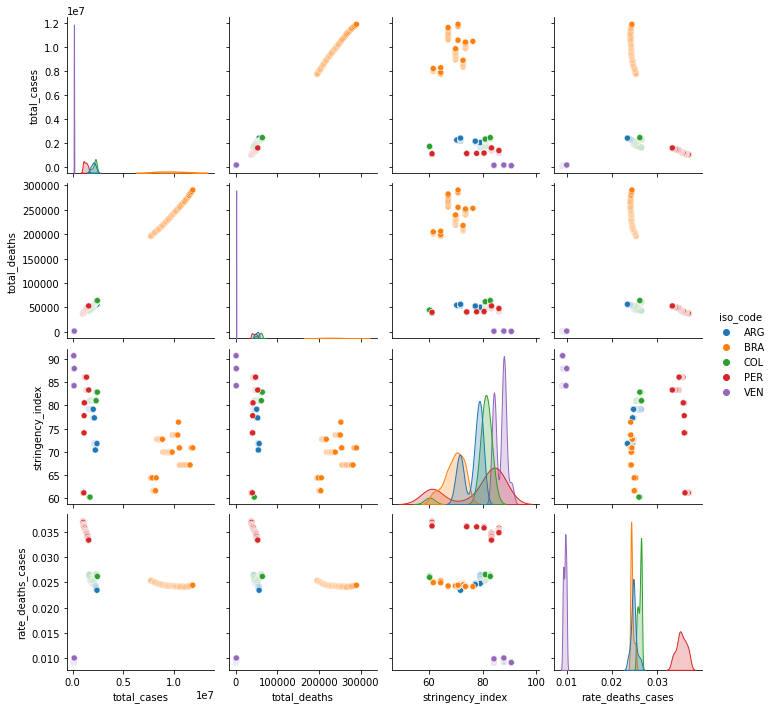

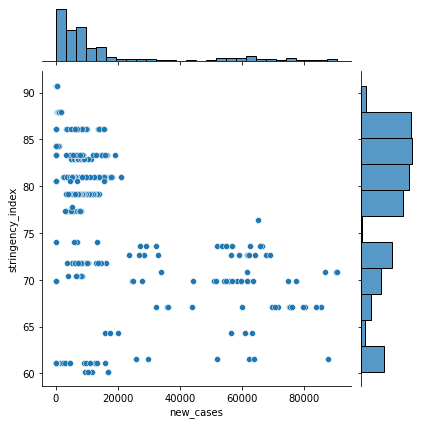

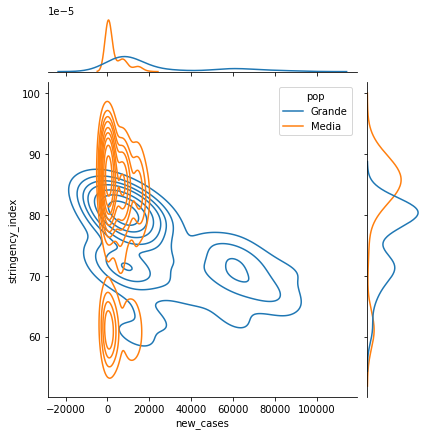

In [ ]:
# 7.6 - Combinados
## pairplot
### Simples
sns.pairplot(df_new.loc[:, ['total_cases', 'total_deaths', 'stringency_index', 'rate_deaths_cases']])
plt.show();
### Adicionando detalhes
sns.pairplot(df_new.loc[:, ['iso_code', 'total_cases', 'total_deaths', 'stringency_index', 'rate_deaths_cases']], hue="iso_code", diag_kind="kde")
plt.show();
## jointplot
### Simples
sns.jointplot(data=df_new, x="new_cases", y="stringency_index") # kind="hex"
plt.show();
### Adicionando detalhes
sns.jointplot(data=df_new, x="new_cases", y="stringency_index", hue="pop", kind="kde")
plt.show();